### Creating grid for Lake Geneva 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pyproj import Transformer
import os

from grid_and_bathy import get_grid_angle, rotate_grid

In [21]:
path_out = r'C:\Users\leroquan\Documents\00-Work_space\06-mit_gcm_geneva\data\grid\200m'
dx=200;dy=200
Nx=1344 / 4; Ny=528 / 4 #Ny initially set to 120

# point of origin in swiss grid 
XO_SG = 500000
YO_SG = 116500

# second point for tilted grid
X1_SG = 563000
Y1_SG = 138700

# XY on mitgcm grid 
x = np.arange(0,Nx*dx,dx)
y = np.arange(0,Ny*dy,dy)

xgrid, ygrid = (np.meshgrid(x,y))

angle = get_grid_angle(XO_SG, YO_SG, X1_SG, Y1_SG)

In [22]:
xlexplore= np.array(540996)
ylexplore = np.array(150145)

In [23]:
xlexplore

array(540996)

In [29]:
# XY on swiss grid 
xsg_grid, ysg_grid = np.meshgrid(xlexplore,ylexplore)
x_rotated, y_rotated = rotate_grid(xsg_grid, ysg_grid, XO_SG, YO_SG, -angle)
x_sg = x_rotated - XO_SG
y_sg = y_rotated - YO_SG

In [32]:
x_sg

array([[49847.5486153]])

In [3]:
# XY on swiss grid 
x_sg = x + XO_SG
y_sg = y + YO_SG
xsg_grid, ysg_grid = np.meshgrid(x_sg,y_sg)

In [4]:
x_rotated, y_rotated = rotate_grid(xsg_grid, ysg_grid, XO_SG, YO_SG, angle)

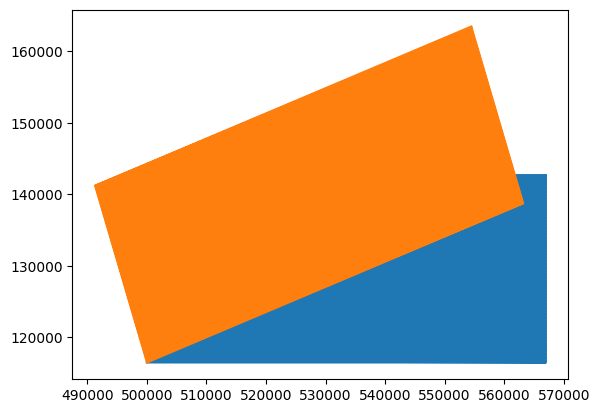

In [5]:
plt.plot(xsg_grid.flatten(), ysg_grid.flatten())
plt.plot(x_rotated.flatten(), y_rotated.flatten())

In [6]:
coord_converter = Transformer.from_crs("EPSG:21781", "EPSG:4326", always_xy=True)
lon_grid, lat_grid = coord_converter.transform(x_rotated,y_rotated)

#### longitude changes slightly

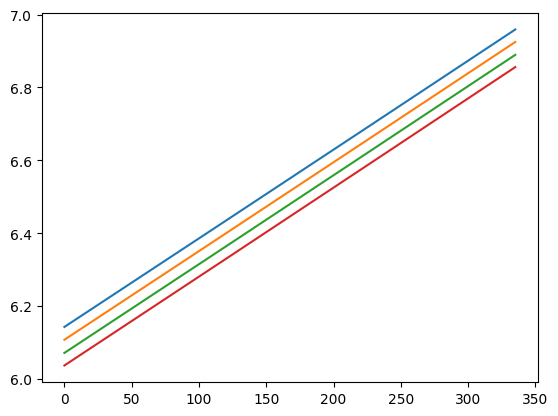

In [7]:
plt.plot(lon_grid[1,:])
plt.plot(lon_grid[40,:])
plt.plot(lon_grid[80,:])
plt.plot(lon_grid[118,:])


In [8]:
with open(os.path.join(path_out, 'x.npy'), 'wb') as f:
    np.save(f, x)

with open(os.path.join(path_out, 'y.npy'), 'wb') as f:
    np.save(f, y)

with open(os.path.join(path_out, 'x_sg_grid.npy'), 'wb') as f:
    np.save(f, x_rotated)

with open(os.path.join(path_out, 'y_sg_grid.npy'), 'wb') as f:
    np.save(f, y_rotated)

with open(os.path.join(path_out, 'lat_grid.npy'), 'wb') as f:
    np.save(f, lat_grid)

with open(os.path.join(path_out, 'lon_grid.npy'), 'wb') as f:
    np.save(f, lon_grid)

#### Z-grid
- dz should be increasing (without big jumps)
- above 30m: 1m 
- below 30m: 5m
- below 160m: coaser??
- try out exponential curve if vertical cells have to be much coarser at depth 


with open(path_out + 'z.npy', 'wb') as f:
    np.save(f, -Z)

with open(path_out + 'dz.npy', 'wb') as f:
    np.save(f, dz)